In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math
import datetime
from docx import Document
from docxtpl import DocxTemplate, InlineImage
import sys
import os
from docx.shared import Mm, Inches, Pt

In [2]:
c = input("Input one of the following Country Codes to generate report - US, NZ, MX, GB, IE, CA: ")

email_receiver = input("Email to send report: ")

Input one of the following Country Codes to generate report - US, NZ, MX, GB, IE, CA: NZ
Email to send report: telmabatista94@gmail.com


## Data Visualization

In [3]:
df = pd.read_csv("ticket_df.csv")

df.head()

df["average_price_eur"] = df[["min_price_eur","max_price_eur"]].mean(axis=1)

df["month"] = pd.DatetimeIndex(df["date"]).month


df1 = df[df["country_code"]==c]

df1.head()

,name,type,id,url,locale,date,date_status,segment,genre,subgenre,...,venue_name,venue_type,venue_timezone,city,country,country_code,min_price_eur,max_price_eur,average_price_eur,month
1000,Harry Styles,event,1Ae8ZpkGklXDV1y,http://www.ticketmaster.co.nz/harry-styles-auc...,en-us,2020-11-23,onsale,Music,Pop,Pop,...,Spark Arena,venue,Pacific/Auckland,Auckland,New Zealand,NZ,54.849916,212.587526,133.718721,11
1001,Backstreet Boys: DNA World Tour,event,1Ae8Z4wGklYHN-Z,https://www.ticketmaster.co.nz/backstreet-boys...,en-us,2020-05-16,onsale,Music,Rock,Pop,...,Spark Arena,venue,Pacific/Auckland,Auckland,New Zealand,NZ,54.225696,276.773598,165.499647,5
1002,Backstreet Boys: DNA World Tour,event,1Ae8Z4wGkUZsv58,https://www.ticketmaster.co.nz/backstreet-boys...,en-us,2020-05-17,onsale,Music,Rock,Pop,...,Spark Arena,venue,Pacific/Auckland,Auckland,New Zealand,NZ,54.225696,276.773598,165.499647,5
1003,Louis Tomlinson,event,1A0ZAq9GkdtmKp-,https://www.ticketmaster.co.nz/louis-tomlinson...,en-us,2020-04-23,onsale,Music,Rock,Pop,...,"Shed 10, Queens Wharf",venue,Pacific/Auckland,Auckland,New Zealand,NZ,46.843619,46.843619,46.843619,4
1004,Elton John - Farewell Yellow Brick Road,event,1Ae8Z40GkTn47rb,https://www.ticketmaster.co.nz/elton-john-fare...,en-us,2021-01-15,onsale,Music,Rock,Pop,...,Mt Smart Stadium,venue,Pacific/Auckland,Auckland,New Zealand,NZ,56.006079,239.249851,147.627965,1


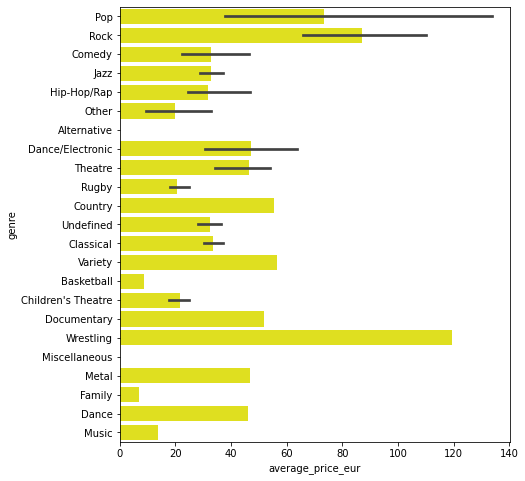

In [4]:
f, ax = plt.subplots(figsize=(7,8))
ax = sb.barplot(x="average_price_eur",y="genre",data=df1, color="yellow")
plt.savefig("/Users/telmabatista/Documents/Ironhack/Projects/Project3/Project-Week-3-Data-Thieves/your-project/Report/price_per_genre.png")

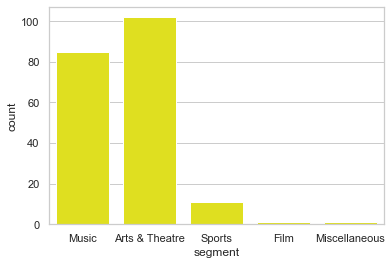

In [5]:
sb.set(style="whitegrid")
ax = sb.countplot(x="segment",data=df1, color="yellow")
plt.savefig("/Users/telmabatista/Documents/Ironhack/Projects/Project3/Project-Week-3-Data-Thieves/your-project/Report/events_per_segment.png",bbox_inches="tight")

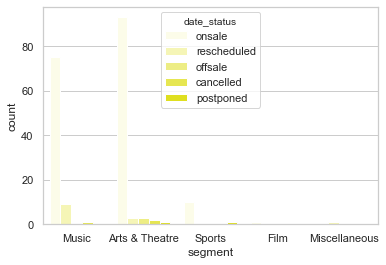

In [6]:
sb.set(style="whitegrid")
ax = sb.countplot(x="segment", hue="date_status",data=df1, color="yellow")
plt.savefig("/Users/telmabatista/Documents/Ironhack/Projects/Project3/Project-Week-3-Data-Thieves/your-project/Report/status_per_segment.png",bbox_inches="tight")

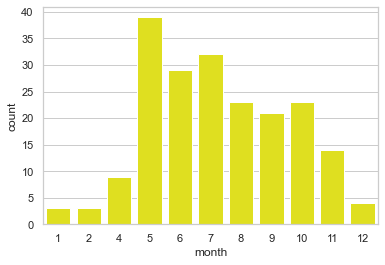

In [7]:
sb.set(style="whitegrid")
ax = sb.countplot(x="month",data=df1, color="yellow")
plt.savefig("/Users/telmabatista/Documents/Ironhack/Projects/Project3/Project-Week-3-Data-Thieves/your-project/Report/events_per_month.png",bbox_inches="tight")

## Images inputed into Template

In [8]:

word_doc_template = "word_doc_template.docx"
word_doc_w_images_loaded = "Country_Report.docx"
image_dirname = "/Users/telmabatista/Documents/Ironhack/Projects/Project3/Project-Week-3-Data-Thieves/your-project/Report"

# Don't want to overwrite your template with the loaded images version.
assert word_doc_template != word_doc_w_images_loaded

doc = DocxTemplate(word_doc_template)

images_to_load = {}

for image_filename in os.listdir(image_dirname):
    # Remove extension to filename in dict key.
    template_varname = image_filename.split('.')[0]
    images_to_load[template_varname] = InlineImage(doc,os.path.join(image_dirname, image_filename))

doc.render(images_to_load)

doc.save(word_doc_w_images_loaded)

## Changing Report Name Automatically

In [9]:
#Getting country name through country code
country_name = ' '.join([str(elem) for elem in df1["country"].unique()]) 

In [10]:
document = Document('Country_Report.docx')

dic = {'Country':country_name}
for p in document.paragraphs:
    inline = p.runs
    for i in range(len(inline)):
        text = inline[i].text
        if text in dic.keys():
            text=text.replace(text,dic[text])
            inline[i].text = text

document.save('Country_Report.docx')

## Converting docx to PDF

In [11]:
from docx2pdf import convert

convert("Country_Report.docx")

## Sending Email with Country Report as Attachment

In [12]:
import os
import smtplib
from email.message import EmailMessage

EMAIL_ADDRESS = os.environ.get("EMAIL_ADDRESS")
EMAIL_PASSWORD = os.environ.get("EMAIL_PASSWORD")

msg = EmailMessage()
msg["Subject"] = "Country Report"
msg["From"] = EMAIL_ADDRESS
msg["To"] = email_receiver
msg.set_content("Hi! You'll find the report attached in this email. Tell me if you need anything else!")

files = ["Country_Report.pdf"]

for file in files:
    with open(file,"rb") as f:
        file_data = f.read()
        file_name = f.name

    msg.add_attachment(file_data, maintype="application", subtype="octet-stream", filename=file_name)

with smtplib.SMTP_SSL("smtp.gmail.com", 465) as smtp:
    smtp.login(EMAIL_ADDRESS,EMAIL_PASSWORD)
    smtp.send_message(msg)